In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
healthinsuranceMasterdata=pd.read_excel('C:/Users/leksh/Documents/spring board/data story telling/insurance data set.xlsx')

In [3]:
#First 5 rows of the dataset
healthinsuranceMasterdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Find the number of rows and columns of the dataset
healthinsuranceMasterdata.shape

(1338, 7)

The dataset has 1338 rows and 7 columns. The columns are age, sex,bmi, children, smoker, region and charges

In [5]:
#Summarize the dataset
healthinsuranceMasterdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The mean age is 39.2 with a standard deviation of 14.1.Minimum age is 18 and maximum age is 64. The bmi ranges from 15.96 to 53.13 with an average of 30.7 .Its standard deviation is 6.1.The number of children in the dataset range from 0 to 5 with an average of 1.1 and a standard deeviation of 1.2. The charges range from 1121.9 to 63770.43 with an average of 13270.42 and standard deviation of 12110.011.

In [6]:
#Finding the variable types
healthinsuranceMasterdata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

age, bmi, children and charges are numerical variables while sex, region and  smoker are non numerical variables

In [7]:
#Finding the proportion of males and number of females
healthinsuranceMasterdata['sex'].value_counts(normalize = True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [8]:
#Finding the proportion of smokers and nonsmokers
healthinsuranceMasterdata['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [9]:
#Finding the proportion of each region in the datset
healthinsuranceMasterdata['region'].value_counts(normalize=True)

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [10]:
#Converting sex to numerical variable
healthinsuranceMasterdata['sex'].replace({"male":0,"female": 1}, inplace=True)
healthinsuranceMasterdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [11]:
#Converting smokerto numerical variable
healthinsuranceMasterdata['smoker'].replace({"no":0,"yes": 1}, inplace=True)
healthinsuranceMasterdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [12]:
#Converting region to numerical variable
healthinsuranceMasterdata['region'].replace({"southeast":1,"southwest":2,"northwest":3,"northeast":4}, inplace=True)
healthinsuranceMasterdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [13]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column  

missing =healthinsuranceMasterdata.isnull().sum(axis=0)
missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='age'>

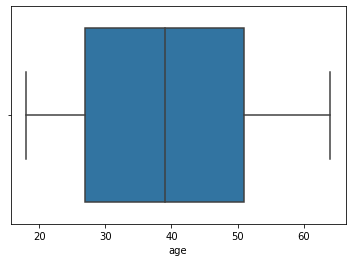

In [14]:
#To find the outliers in age
sns.boxplot( x=healthinsuranceMasterdata["age"])

<AxesSubplot:xlabel='bmi'>

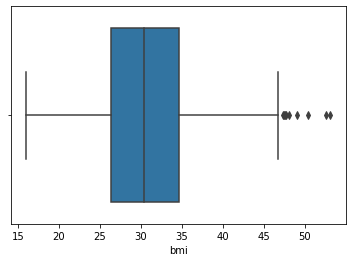

In [15]:
#To find the outliers in bmi
sns.boxplot( x=healthinsuranceMasterdata["bmi"])

<AxesSubplot:xlabel='charges'>

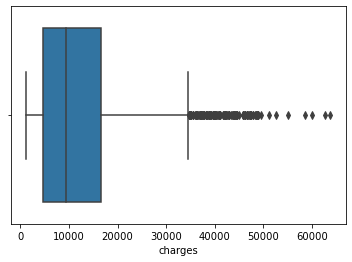

In [16]:
#To find the outliers in charges
sns.boxplot( x=healthinsuranceMasterdata["charges"])

In [17]:
# Remove the outlier  for charges
healthinsuranceMasterdata.drop(healthinsuranceMasterdata[healthinsuranceMasterdata['charges']>=50000].index, inplace = True)

<AxesSubplot:xlabel='charges'>

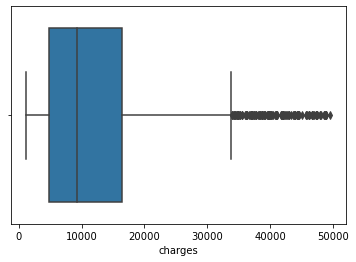

In [23]:
#Nowfind the outliers in charges
sns.boxplot( x=healthinsuranceMasterdata["charges"])

<AxesSubplot:xlabel='children'>

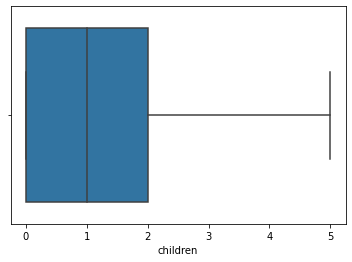

In [18]:
#To find the outliers in children
sns.boxplot( x=healthinsuranceMasterdata["children"])

# Relationship of features with charges

In [19]:
#Find the correlation of quantitative variables with charges
healthinsuranceMasterdata[['charges','age','children','bmi']].corr()3

,charges,age,children,bmi
charges,1.000000,0.304561,0.076993,0.187061
age,0.304561,1.000000,0.043197,0.108331
children,0.076993,0.043197,1.000000,0.014860
bmi,0.187061,0.108331,0.014860,1.000000


Find the association of categorical variables with charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

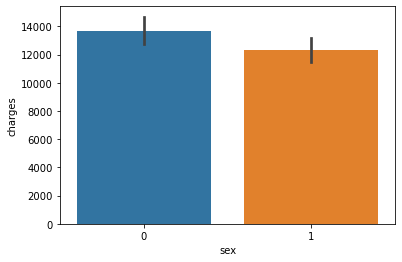

In [20]:
 sns.barplot(x="sex", y="charges", data=healthinsuranceMasterdata)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

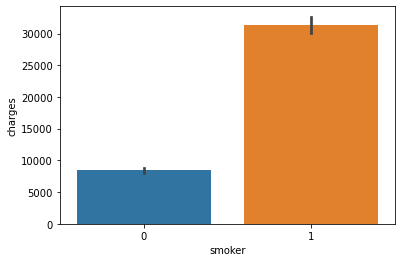

In [21]:
sns.barplot(x="smoker", y="charges", data=healthinsuranceMasterdata)

<AxesSubplot:xlabel='region', ylabel='charges'>

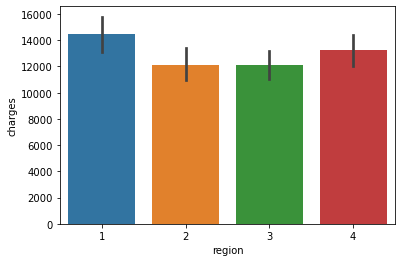

In [22]:
sns.barplot(x="region", y="charges", data=healthinsuranceMasterdata)

In [25]:
#Defining dependent variable
Y=healthinsuranceMasterdata['charges']

In [26]:
#Defining independent variables
X=healthinsuranceMasterdata[['age','bmi','children','sex','smoker','region']]

In [27]:
#Split inthttp://localhost:8888/notebooks/Documents/spring%20board/data%20story%20telling/Story%20from%20health%20insurance%20dataset.ipynb#o testing and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)


In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg.score(X_train,Y_train)

0.7560539228947913

In [28]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train.astype(float))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              1273.
Date:                Mon, 27 Dec 2021   Prob (F-statistic):                        0.00
Time:                        16:49:29   Log-Likelihood:                         -10792.
No. Observations:                1064   AIC:                                  2.160e+04
Df Residuals:                    1058   BIC:                                  2.163e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_test, Y_test)
reg.score(X_test,Y_test)


0.7412992734475581

In [34]:
#PREDICTED VALUES
Y_pred = reg.predict(X_test)

In [35]:
#Making a dataframe for actual and  predicted values 
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

In [36]:
#To find the Root mean squared error
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(df['Actual'], df['Predicted'])
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

5827.059945090297


In [37]:
#To find MAPE
from sklearn.metrics import mean_absolute_percentage_error
import math
 
MAPE = mean_absolute_percentage_error(df['Actual'], df['Predicted'])
 
print("Mean Absolute Percentage Error:\n")
print(MAPE)

Mean Absolute Percentage Error:

0.4017427181714434


# Presentation of Findings

The dataset  focusing on health insurance costs and patient information consists of 1,338 rows and 7 columns.  There are three steps involved in the data analysis process-data exploration, data cleaning and modeling.  It is found that out of the seven variables, four are numeric and three are non numeric. The four numeric variables are summarized using summary statistics and the three non mueric variables are explored by finding the proportions of each element in the variables.The mean age is 39.2 with a standard deviation of 14.1.Minimum age is 18 and maximum age is 64. The bmi ranges from 15.96 to 53.13 with an average of 30.7 .Its standard deviation is 6.1.The number of children in the dataset range from 0 to 5 with an average of 1.1 and a standard deeviation of 1.2. The charges range from 1121.9 to 63770.43 with an average of 13270.42 and standard deviation of 12110.011.Males constitute majority of patients  in the dataset and majority are non smokers. No missing values are found in the dataset. Some extreme values are found in the health care cost variable which are removed in the final analysis.After converting the non numeric variables to numeric variables, the relationship of  each factor with the health insurance charges are examined using  correlations and visualizations. The prelimiray trends and rgeression analysis  show signifiant relationship of age ,bmi, children, smokercategory and region with healthcare charges .Thus the  hypotheses that can be developed from the analysis include the following(1)Smoker patients have to incur more health care costs than non smokers(2) Sex of the patients does not affect the healthcare charges,while patients with high bmis are found to incur more health care costs than those with lwoer bmis.(3)patients with more  children are found to incur more healthcare costs than those with fewer children (4)Regional variations affect the patients' healthcare costs significantly.